# Handwritten digits

Here we're going to use the MNIST database. This contains a set of images with handwritten digits. It is one of the most widely used and best studied datasets in the whole of machine learning. It's part of the standard tests new tecniques need to face.

In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import Isomap
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

## Get the data

In [2]:
digits = datasets.load_digits()
print(digits.images.shape)
print(digits.keys())

(1797, 8, 8)
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


## Part 0.

1) First thing, grab a piece of paper and visually classify those 25 digits. We'll see if you're better or worse than a computer! 

**Spoiler alert: Davide's efficiency was ~80%, much worse than ML!**


2) Here is how you plot the images and the corresponding labels  (The one thing I'm not telling you of course is the random seed I used to select those above). After you've seen this ones, go back to your piece of paper and update your choices if you want. Keep track of both set of preditions. This is like supervised learning.  


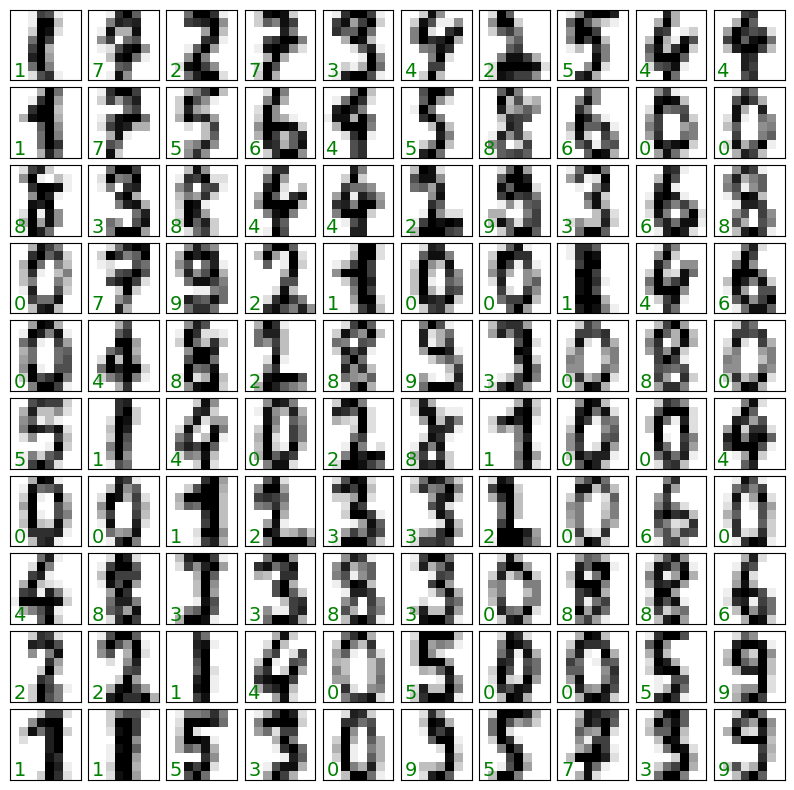

In [3]:
fig, axes = plt.subplots(10,10, figsize=(10, 10))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

np.random.seed(42)
mychoices = np.random.choice(digits.images.shape[0],100)

for i, ax in enumerate(axes.flat):
    ax.imshow((digits.images[mychoices[i]]), 
              cmap='binary')
    ax.text(0.05, 0.05, str(digits.target[mychoices[i]]),transform=ax.transAxes, color='green', fontsize=14)
    ax.set_xticks([])
    ax.set_yticks([])

In [4]:
print(digits.data.shape)

#The images themselves, one element
print(digits.images[0])

#The data for use in our algorithms, one element
print(digits.data[0])

#The labels
print(digits.target)
print(digits.target[0])

(1797, 64)
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
[0 1 2 ... 8 9 8]
0


## Part 1: Dimensionality reduction
We'd like to visualize our points within the 64-dimensional parameter space, but it's difficult to plot points in N=64 dimensions! So we need to reduce the dimensionality of the space.
1. Use the unsupervised dimensionality reduction technique called Isomap. Isomap is an embedding tecnique, which tries to understand if your N dimensional datapoint live in a N dimensional (with  N<M) manyfold. Have a look at the Isomap documentation and reduce the MINST dataset. Do some plots to visualize your results.

In [5]:
isomap = Isomap(n_components=2, n_neighbors=10) #we have 64 dimensions, we want to reduce it to 2 dimensions 
X = digits.data     #Shape: (1797, 64) -> 1797 images (arrays), 8x8=64 pixels (dimensions)
target = digits.target     #Real labels
X_tr = isomap.fit_transform(X) #Adapt the model to data and project them in the 2D space, X_tr is array with the original data projected in 2D space
X_tr.shape #Show the shape of X_tr that should be (1787,2)

(1797, 2)

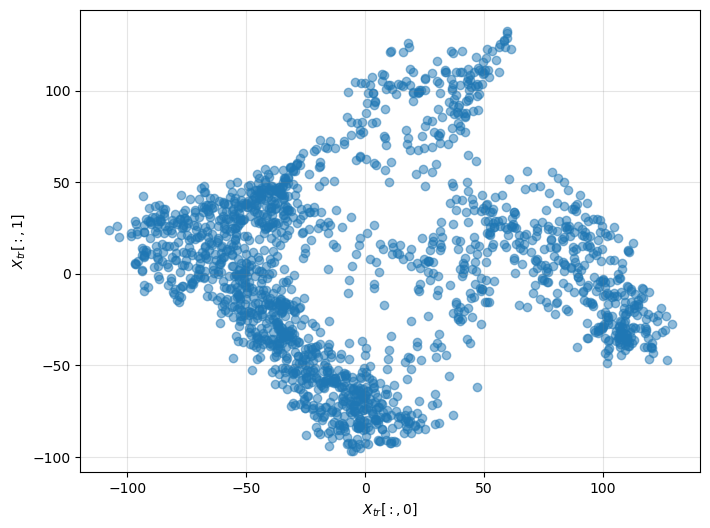

In [6]:
fig = plt.figure(figsize=(8,6))
ax = fig.gca()
ax.grid(c='grey', alpha = 0.2)

ax.set_xlabel('$X_{tr}[:, 0]$')
ax.set_ylabel('$X_{tr}[:, 1]$')
ax.scatter(X_tr[:, 0], X_tr[:, 1], alpha = 0.5)

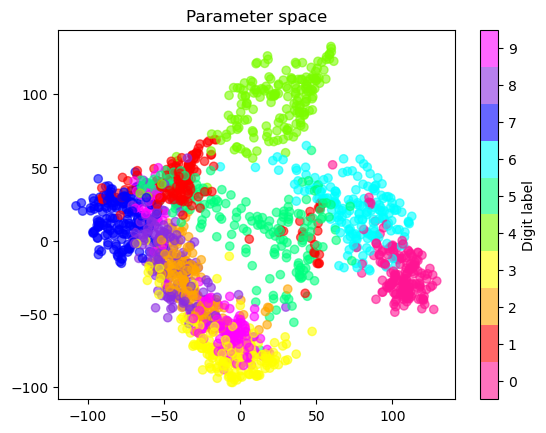

In [7]:
colors = ['deeppink', 'red', 'orange', 'yellow', 'lawngreen', 'springgreen', 'cyan', 'blue', 'blueviolet', 'magenta']
custom_cmap = ListedColormap(colors)

plt.scatter(X_tr[:, 0], X_tr[:, 1], c=target, cmap=custom_cmap, alpha=0.6)
plt.title('Parameter space')
plt.colorbar(label='Digit label', ticks=range(0, 10))
plt.clim(-0.5, 9.5)
plt.show()

Digits seem to be well separated, so hopefully the classification algorithm should work correctly.

## Part 2: Classification
Now we want to classify the dataset.
1. Split the dataset taking 80% of the images as training dataset and leaving the other 20% as a validation set. You need: sklearn.model_selection.train_test_split
2. Use a simple Logistic Regression which despite its name is a common classification algorithm. (I know, this is confusing!). Use the flag solver='sag' (I found the default solver had a bug, at least when I tried).
3. Compute the accuracy (sklearn.metrics.accuracy_score) of your emulator. In this context, accuracy is simply the fraction of the digits that were correctly identified. Compute the accuracy on both the training and the validation set. Comment on the results.
4. The accuracy is a single number doesn't tell us where we've gone wrong. Plot the confusion matrix as we did above. What are the digits that are more challenging to identify, does it make sense?

In [8]:
#Taking 80% of the dataset as traninig dataset, 20% as validation set
X_train, X_test, Y_train, Y_test = train_test_split(X, target, test_size=0.2, random_state=42) #X=data, Y=target
print(X_train.shape, X_test.shape)

(1437, 64) (360, 64)


### Logistic regression

In [9]:
model = LogisticRegression(penalty='l2',solver='sag', max_iter=2000)
model.fit(X_train, Y_train) #Train the model with the training set

LogisticRegression(max_iter=2000, solver='sag')

In [10]:
Y_pred_v = model.predict(X_test) #Predict the labels on the validation set, returns the learned label for each object of the validation set
Y_pred_t = model.predict(X_train) #The same for the training set

#Evaluate the accuracy
accuracy_v = accuracy_score(Y_test, Y_pred_v)
print("Accuracy for validation set:", accuracy_v)
accuracy_t = accuracy_score(Y_train, Y_pred_t)
print("Accuracy for training set:", accuracy_t)

Accuracy for validation set: 0.9694444444444444
Accuracy for training set: 1.0


In [11]:
#Confusion matrix for the validation dataset
print(confusion_matrix(Y_test, Y_pred_v))

[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  1  0  0 44  0  1  0  0  0]
 [ 0  0  1  0  0 44  1  0  0  1]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  1  0 33  0  0]
 [ 0  0  0  0  0  1  0  0 29  0]
 [ 0  0  0  1  0  0  0  0  1 38]]


As we can observe the classification is quiete good, we have some ploblems in classification: 4 is wrongly predicted to be 1 in one case and 6 in one case, 5 is wrongly predicted to be 6 and 9 in one case and so on. 

## Now check the value of the beginning numbers

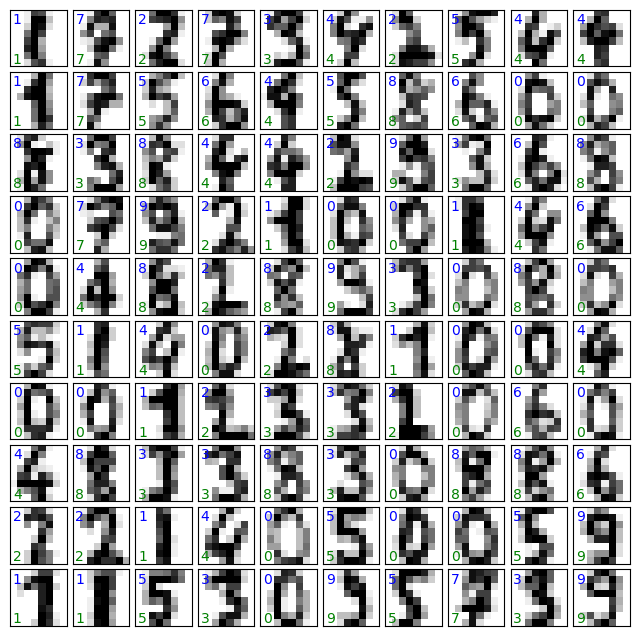

In [12]:
X_choice = X[mychoices]
y_choice = target[mychoices]
y_pred_choice = model.predict(X[mychoices])

#Now we show the wrong number in red and the good one in green 
fig2, axes = plt.subplots(10, 10, figsize=(8, 8))
fig2.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax2 in enumerate(axes.flat):
    ax2.imshow((digits.images[mychoices[i]]), cmap='binary')
    ax2.text(0.05, 0.05, str(y_pred_choice[i]), transform=ax2.transAxes, color='green' if (y_choice[i] == y_pred_choice[i]) else 'red')    
    ax2.text(0.05, 0.75, str(y_choice[i]), transform=ax2.transAxes, color='blue')
    ax2.set_xticks([])
    ax2.set_yticks([])

In [13]:
## Check the accuracy and the confusion matrix
accuracy_choice= accuracy_score(y_choice, y_pred_choice)
print("Accuracy", accuracy_choice)
print(confusion_matrix(y_choice, y_pred_choice))

Accuracy 1.0
[[20  0  0  0  0  0  0  0  0  0]
 [ 0 10  0  0  0  0  0  0  0  0]
 [ 0  0 10  0  0  0  0  0  0  0]
 [ 0  0  0 11  0  0  0  0  0  0]
 [ 0  0  0  0 12  0  0  0  0  0]
 [ 0  0  0  0  0  8  0  0  0  0]
 [ 0  0  0  0  0  0  6  0  0  0]
 [ 0  0  0  0  0  0  0  5  0  0]
 [ 0  0  0  0  0  0  0  0 12  0]
 [ 0  0  0  0  0  0  0  0  0  6]]


From the confusion matrix seems that the model never fail. We try know to increase the number of digits to predict.

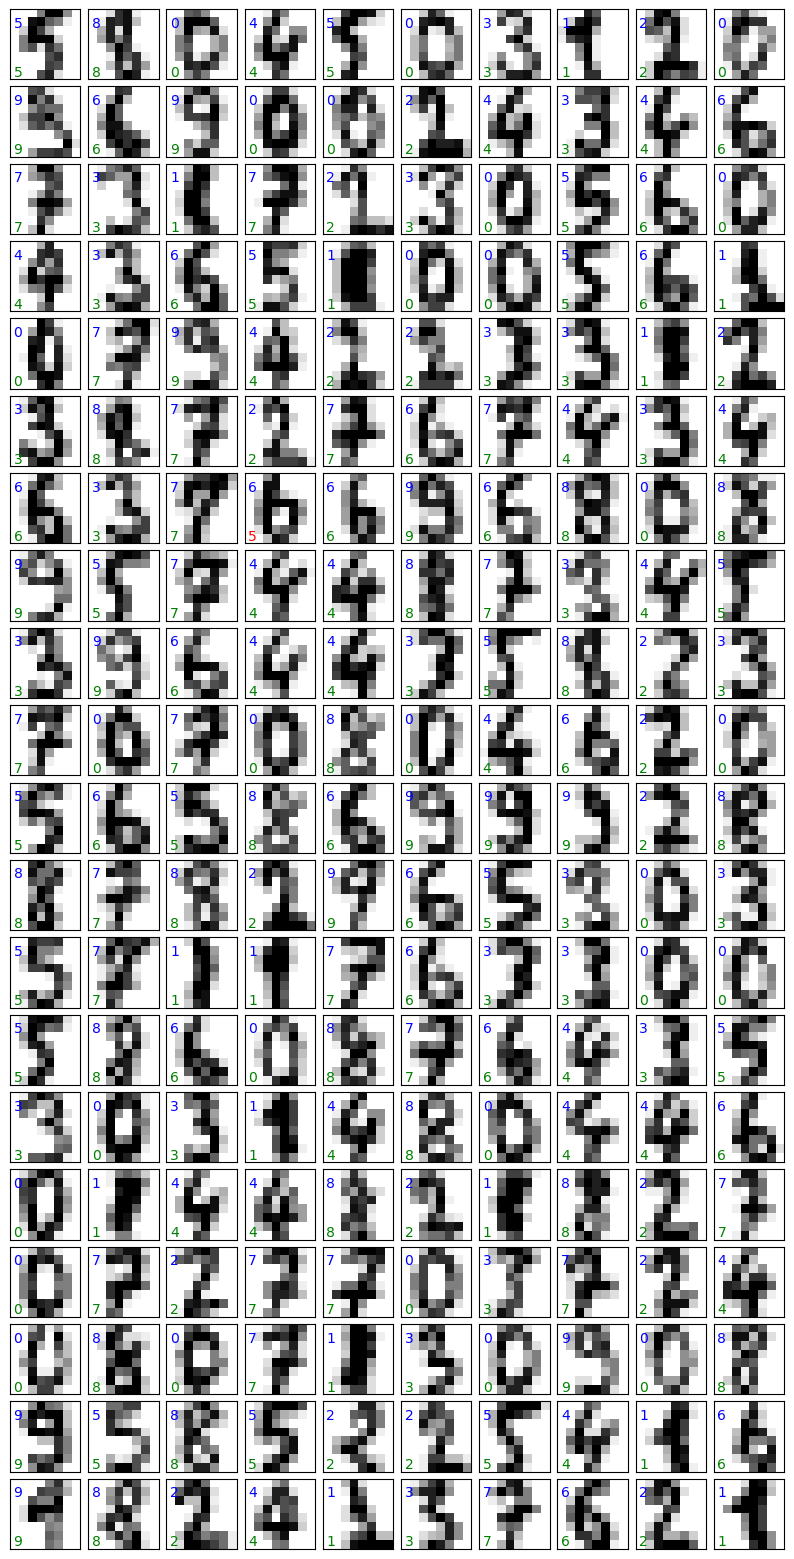

In [24]:
mychoices = np.random.choice(digits.images.shape[0], 200)
X_choice = X[mychoices]
y_choice = target[mychoices]
y_pred_choice = model.predict(X[mychoices])

#Now we show the wrong number in red and the good one in green 
fig2, axes = plt.subplots(20, 10, figsize=(10, 20))
fig2.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax2 in enumerate(axes.flat):
    ax2.imshow((digits.images[mychoices[i]]), cmap='binary')
    ax2.text(0.05, 0.05, str(y_pred_choice[i]), transform=ax2.transAxes, color='green' if (y_choice[i] == y_pred_choice[i]) else 'red')    
    ax2.text(0.05, 0.75, str(y_choice[i]), transform=ax2.transAxes, color='blue')
    ax2.set_xticks([])
    ax2.set_yticks([])

In [21]:
## Check the accuracy and the confusion matrix
accuracy_choice= accuracy_score(y_choice, y_pred_choice)
print("Accuracy", accuracy_choice)
print(confusion_matrix(y_choice, y_pred_choice))

Accuracy 0.995
[[22  0  0  0  0  0  0  0  0  0]
 [ 0 25  0  0  0  0  0  0  0  0]
 [ 0  0 26  0  0  0  0  0  0  0]
 [ 0  0  0 21  0  0  0  0  0  0]
 [ 0  0  0  0 12  0  1  0  0  0]
 [ 0  0  0  0  0 21  0  0  0  0]
 [ 0  0  0  0  0  0 21  0  0  0]
 [ 0  0  0  0  0  0  0 16  0  0]
 [ 0  0  0  0  0  0  0  0 15  0]
 [ 0  0  0  0  0  0  0  0  0 20]]


Now the accuracy is smaller than 1 so the model is working correctly and not suspiciously too good.